In [33]:
#import libraries
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

Germanleague = pd.read_csv('https://raw.githubusercontent.com/Shinseeker/IS362_FINAL/master/Bundesliga.csv', 
                           usecols=[2,3,4,5,6,7,8,9])
Germanleague.sort_values(["FTHG","FTAG","FTR","HTHG","HTAG","HTR"], ascending=False)
#add League column for when the 2 files are combined
Germanleague['League'] = 'BL1'
#Germanleague = Germanleague.set_index("HomeTeam")
Germanleague

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,League
0,Bayern Munich,Werder Bremen,6,0,H,2,0,H,BL1
1,Augsburg,Wolfsburg,0,2,A,0,1,A,BL1
2,Dortmund,Mainz,2,1,H,1,0,H,BL1
3,Ein Frankfurt,Schalke 04,1,0,H,1,0,H,BL1
4,FC Koln,Darmstadt,2,0,H,1,0,H,BL1
...,...,...,...,...,...,...,...,...,...
274,RB Leipzig,Ingolstadt,0,0,D,0,0,D,BL1
275,Werder Bremen,Hertha,2,0,H,2,0,H,BL1
276,Wolfsburg,Bayern Munich,0,6,A,0,3,A,BL1
277,Augsburg,Hamburg,4,0,H,2,0,H,BL1


In [34]:
#add a League column so it's easy to sort later
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

Englishleague = pd.read_csv('https://raw.githubusercontent.com/Shinseeker/IS362_FINAL/master/Premierleague.csv', 
    usecols=[2,3,4,5,6,7,8,9])

Englishleague.sort_values(["FTHG","FTAG","FTR","HTHG","HTAG","HTR"], ascending=False)
#Englishleague = Englishleague.set_index("HomeTeam")
Englishleague['League'] = 'EPL'
Englishleague

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,League
0,Burnley,Swansea,0,1,A,0,0,D,EPL
1,Crystal Palace,West Brom,0,1,A,0,0,D,EPL
2,Everton,Tottenham,1,1,D,1,0,H,EPL
3,Hull,Leicester,2,1,H,1,0,H,EPL
4,Man City,Sunderland,2,1,H,1,0,H,EPL
...,...,...,...,...,...,...,...,...,...
339,Everton,Chelsea,0,3,A,0,0,D,EPL
340,Man United,Swansea,1,1,D,1,0,H,EPL
341,Middlesbrough,Man City,2,2,D,1,0,H,EPL
342,Tottenham,Arsenal,2,0,H,0,0,D,EPL


In [49]:
#put both leagues into the same chart
leagues = [Germanleague, Englishleague]
both = pd.concat(leagues)
both.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,League
0,Bayern Munich,Werder Bremen,6,0,H,2,0,H,BL1
1,Augsburg,Wolfsburg,0,2,A,0,1,A,BL1
2,Dortmund,Mainz,2,1,H,1,0,H,BL1
3,Ein Frankfurt,Schalke 04,1,0,H,1,0,H,BL1
4,FC Koln,Darmstadt,2,0,H,1,0,H,BL1


In [57]:
from bokeh.charts import Scatter, output_file, show, Line, Bar, Histogram
from bokeh.plotting import figure, show, output_notebook

output_notebook()

p = Histogram(both, values='FTHG', color='League')
show(p, notebook_handle=True)

Loading BokehJS ...

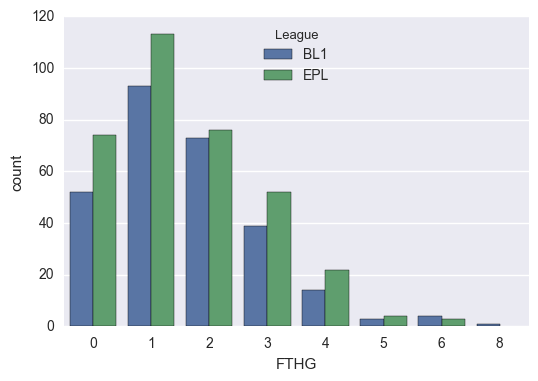

In [55]:
#Germanleague.groupby("FTHG").size().plot(kind="distplot",title="Full Time Home Team Goals")
sns.countplot(x='FTHG', data=both, hue='League')

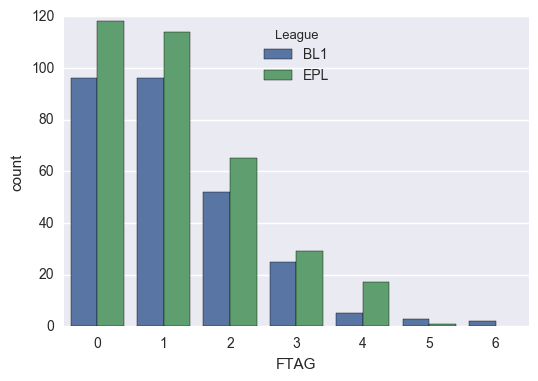

In [56]:
sns.countplot(x='FTAG', data=both, hue='League')

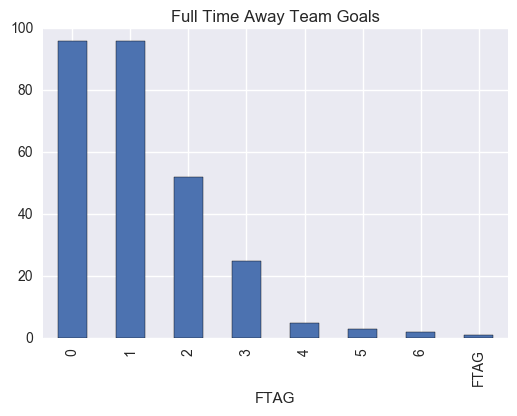

In [4]:
Germanleague.groupby("FTAG").size().plot(kind="bar", title="Full Time Away Team Goals")

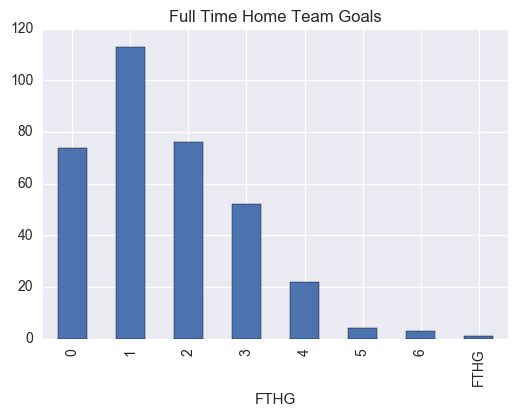

In [5]:
Englishleague.groupby("FTHG").size().plot(kind="bar",title="Full Time Home Team Goals")

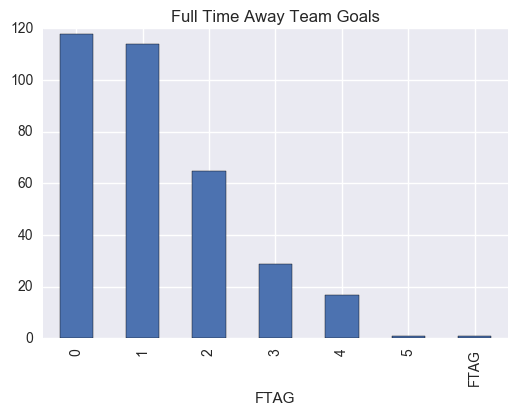

In [6]:
Englishleague.groupby("FTAG").size().plot(kind="bar",title="Full Time Away Team Goals")

In [7]:
pd.merge(Germanleague, Englishleague, on=['FTHG','FTAG','FTR','HTHG','HTAG','HTR'], how='inner')

,AwayTeam_x,FTHG,FTAG,FTR,HTHG,HTAG,HTR,AwayTeam_y
0,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,AwayTeam
1,Wolfsburg,0,2,A,0,1,A,Stoke
2,Wolfsburg,0,2,A,0,1,A,Chelsea
3,Wolfsburg,0,2,A,0,1,A,Man United
4,Wolfsburg,0,2,A,0,1,A,Man City
...,...,...,...,...,...,...,...,...
2150,RB Leipzig,2,3,A,0,0,D,Swansea
2151,Wolfsburg,4,1,H,2,0,H,Stoke
2152,Mainz,2,2,D,1,2,A,West Ham
2153,Mainz,2,2,D,1,2,A,Man City
